In [1]:
%run Function_set_dic.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]


{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (11, 0): '10', (1, 2): '11', (1, 4): '12', (2, 5): '14', (3, 4): '15', (3, 7): '16', (4, 5): '19', (4, 8): '20', (5, 6): '23', (5, 9): '24', (7, 8): '27', (8, 9): '30', (8, 10): '31', (9, 11): '34', (10, 11): '36', (2, 1): '13', (4, 1): '17', (4, 3): '18', (5, 2): '21', (5, 4): '22', (6, 5): '25', (7, 3): '26', (8, 4): '28', (8, 7): '29', (9, 5): '32', (9, 8): '33', (10, 8): '35', (11, 9): '37', (11, 10): '38'}


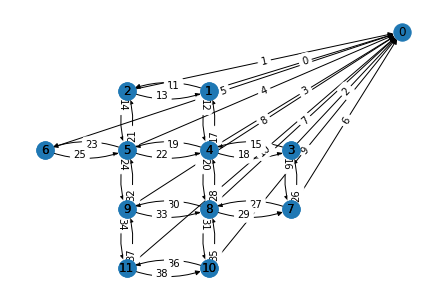

In [4]:
G, compelete_label, graph = complete_Graph(network,pos)
print(compelete_label)

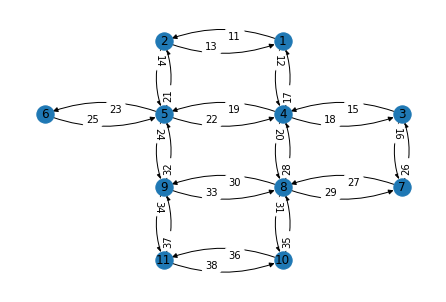

In [5]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [6]:
print(compelete_label)

{(1, 0): '0', (2, 0): '1', (3, 0): '2', (4, 0): '3', (5, 0): '4', (6, 0): '5', (7, 0): '6', (8, 0): '7', (9, 0): '8', (10, 0): '9', (11, 0): '10', (1, 2): '11', (1, 4): '12', (2, 5): '14', (3, 4): '15', (3, 7): '16', (4, 5): '19', (4, 8): '20', (5, 6): '23', (5, 9): '24', (7, 8): '27', (8, 9): '30', (8, 10): '31', (9, 11): '34', (10, 11): '36', (2, 1): '13', (4, 1): '17', (4, 3): '18', (5, 2): '21', (5, 4): '22', (6, 5): '25', (7, 3): '26', (8, 4): '28', (8, 7): '29', (9, 5): '32', (9, 8): '33', (10, 8): '35', (11, 9): '37', (11, 10): '38'}


In [7]:
#%run Function_set_dic.ipynb
#Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)


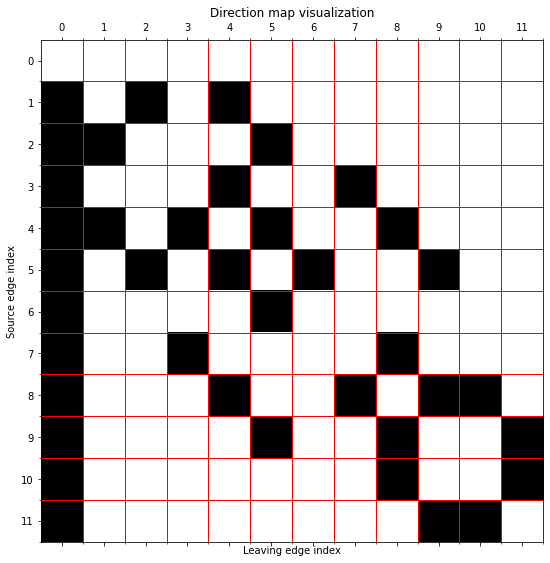

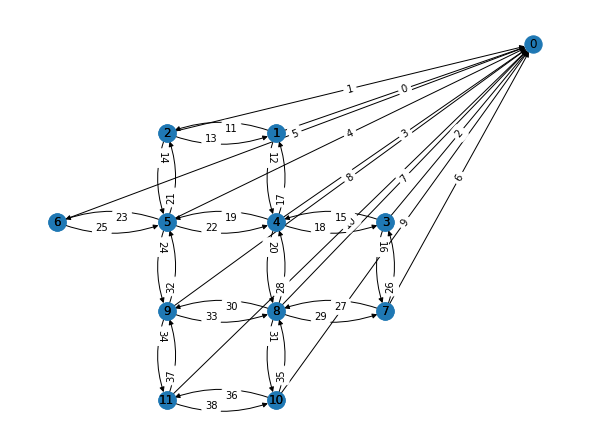

In [38]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(network,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, network.shape[0], step=1))
ax.set_yticks(np.arange(0, network.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, network.shape[0], step=1))
ax.set_yticklabels(np.arange(0, network.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, network.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [39]:
# How many panel ---> Max electricity level wire could reach 
Q = len(pos)-1

print(Q)

# How many edges
edge_number = len(compelete_label)

# make dictionary
edge_dictionary,Total = make_dictionary(edge_number, Q)

# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.ones(edge_number)

# flow cost (p)
flow_cost = np.ones(edge_number)


# initialize a QUBO matrix needed
QUBO_matrix_initial = np.zeros((edge_number*Q,edge_number*Q))



11


In [40]:
%run Function_set_dic.ipynb

QUBO_Obj = Objective(Q, edge_number, edge_dictionary, QUBO_matrix_initial, basic_cost,flow_cost)

penal = 4e1

print("penalty=" , penal)

penalty= 40.0


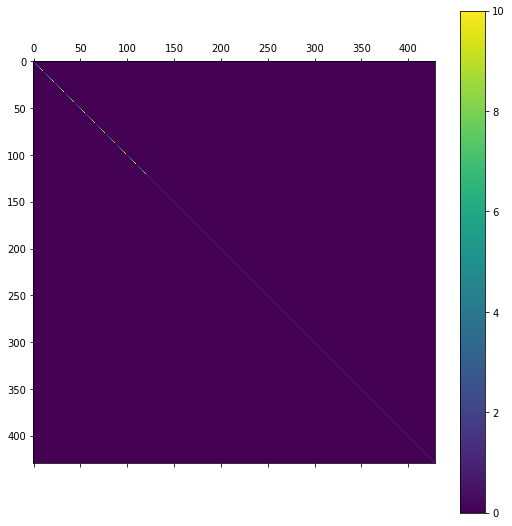

In [41]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [53]:
%run Function_set_dic.ipynb
QUBO_Constraint_1 = Constraint_1(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal*2)

0
11
12
[0 2 4] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142]
1
13
14
[0 1 5] [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164]
2
15
16
[0 4 7] [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]
3
17
18
19
20
[0 1 3 5 8] [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
4
21
22
23
24
[0 2 4 6 9] [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 

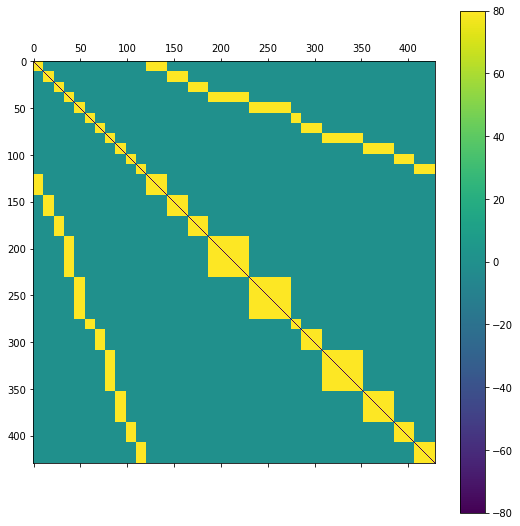

In [54]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [55]:
print(edge_number)

39


In [56]:
%run Function_set_dic.ipynb
QUBO_Constraint_2 = Constraint_2(network, Q, edge_number, edge_dictionary, compelete_label, QUBO_matrix_initial, penalty = penal*1)

vertex 1
OUT
0
11
12
IN
13
17
vertex 2
OUT
1
13
14
IN
11
21
vertex 3
OUT
2
15
16
IN
18
26
vertex 4
OUT
3
17
18
19
20
IN
12
15
22
28
vertex 5
OUT
4
21
22
23
24
IN
14
19
25
32
vertex 6
OUT
5
25
IN
23
vertex 7
OUT
6
26
27
IN
16
29
vertex 8
OUT
7
28
29
30
31
IN
20
27
33
35
vertex 9
OUT
8
32
33
34
IN
24
30
37
vertex 10
OUT
9
35
36
IN
31
38
vertex 11
OUT
10
37
38
IN
34
36


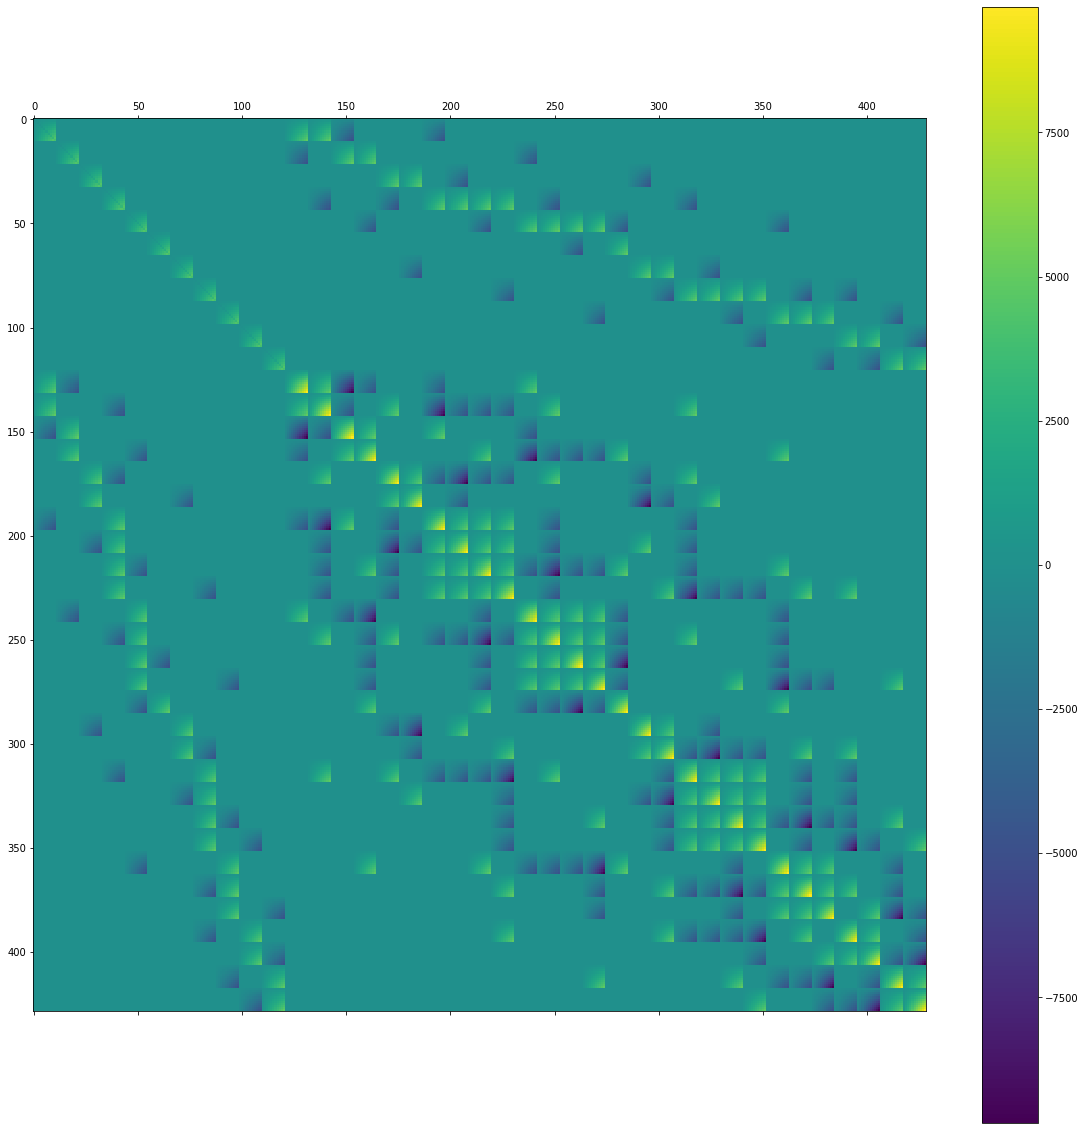

In [57]:
matfig = plt.figure(figsize=(20,20)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [58]:
%run Function_set_dic.ipynb
QUBO_Constraint_add = Constraint_add(network, Q, edge_number, compelete_label, edge_dictionary, QUBO_matrix_initial, penalty = penal*1 )    

11 13
12 17
14 21
15 18
16 26
19 22
20 28
23 25
24 32
27 29
30 33
31 35
34 37
36 38
13 11
17 12
18 15
21 14
22 19
25 23
26 16
28 20
29 27
32 24
33 30
35 31
37 34
38 36


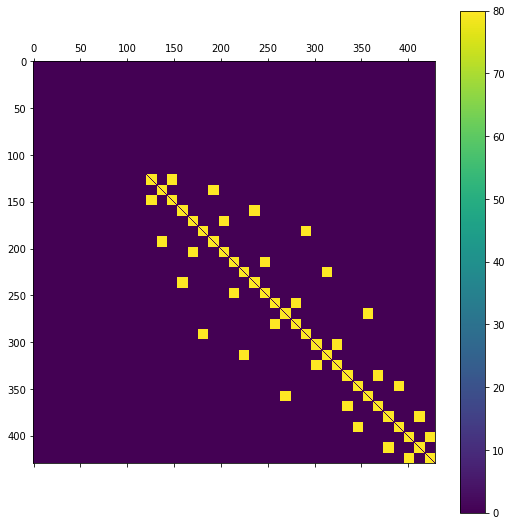

In [59]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_add,fignum=matfig.number)
plt.colorbar()
plt.show()

In [60]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add


QUBO = QUBO_matrix
#QUBO = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add

width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)



OP = sampleset.to_pandas_dataframe()


OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location < edge_number * Q ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index // Q))
print(str(final_index % Q))

for value in final_index:
    #print(str(value//Q))
    final_G.add_weighted_edges_from([(*edge, value % Q + 1) for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)

print(np.shape(QUBO_matrix ))

(429, 429)


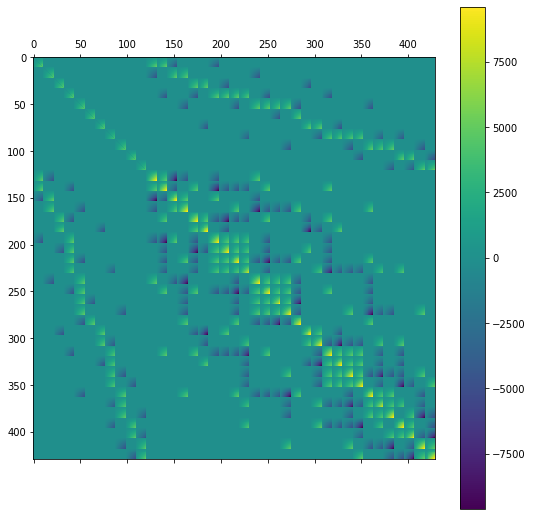

In [61]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [62]:
%run Function_set_dic.ipynb
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,Q)

m_t_u[:] = 0
m_t_l[:] = 0
m_t_u[2:] = 3
m_t_l[2:] = 0

print('m_t_l = ', m_t_l)

m_t_u = np.where(m_t_u < m_t_l, m_t_l, m_t_u)

print('m_t_u = ', m_t_u)


#QUBO_matrix_copy = QUBO_matrix

m_t_l =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_t_u =  [0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:

QUBO_matrix, QUBO_C3_p1, edge_dictionary_C31 = Constraint_3_part_1(network, m_t_u, Q, edge_number, edge_dictionary, QUBO_matrix, penalty = penal)



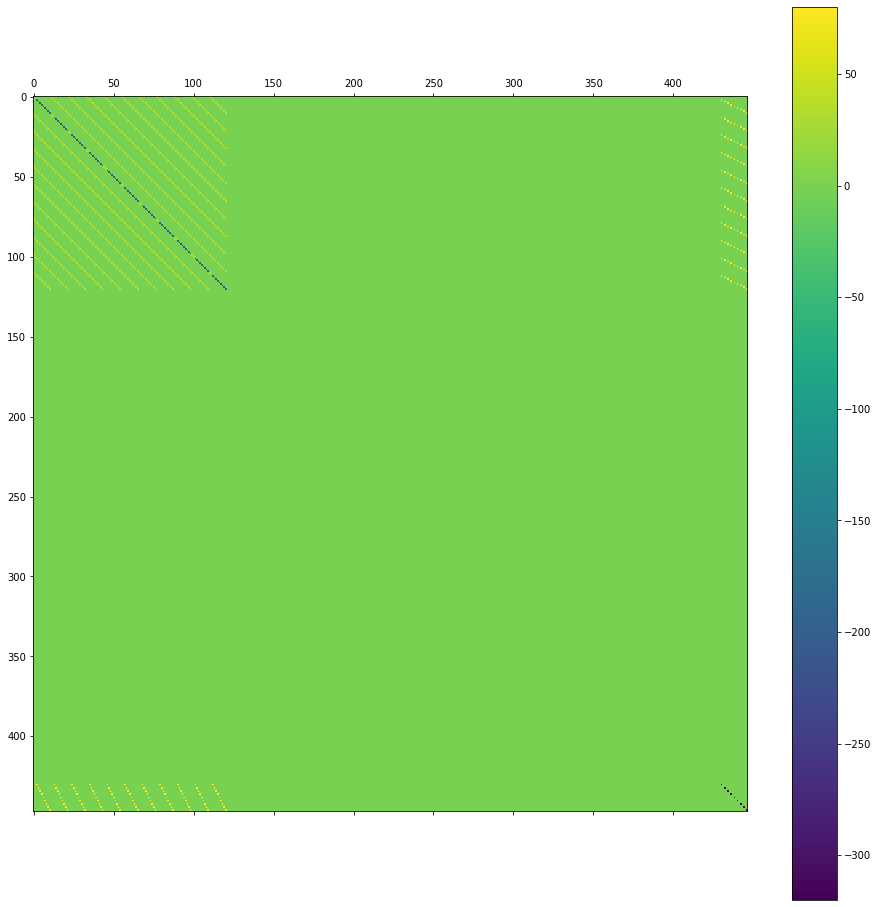

In [23]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p1 ,fignum=matfig.number)
plt.colorbar()
plt.show()

In [24]:
QUBO_matrix, QUBO_C3_p2, edge_dictionary_C32 = Constraint_3_part_2(network, m_t_l, Q, edge_number, edge_dictionary_C31, QUBO_matrix, penalty = penal)

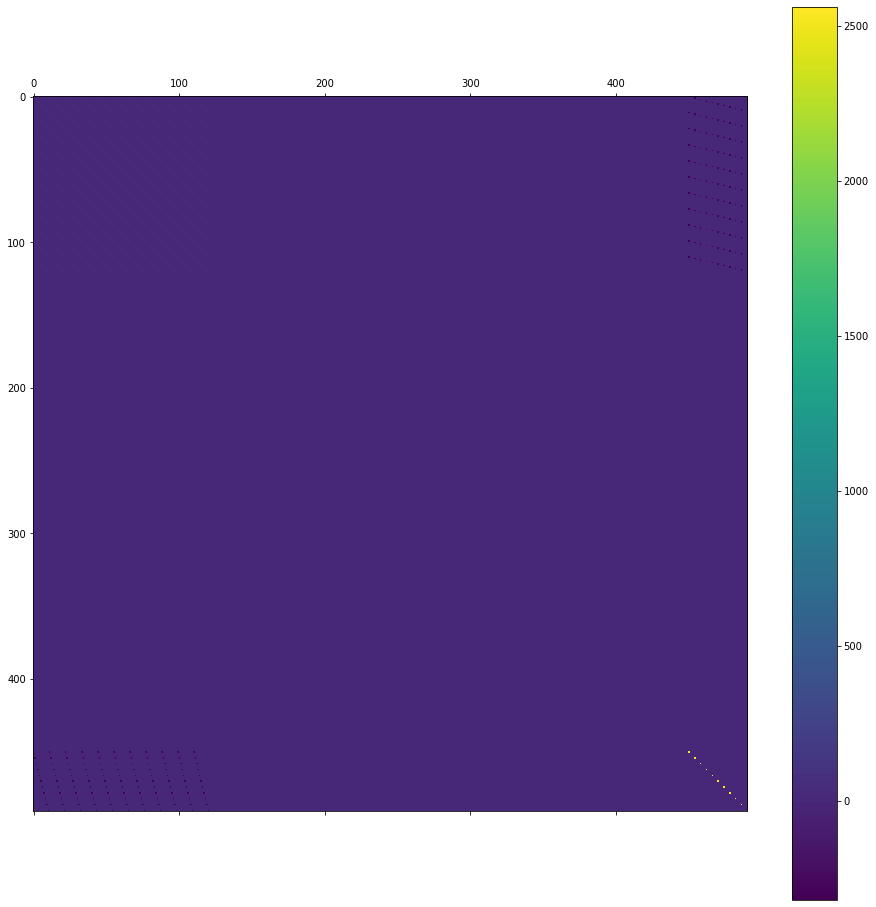

In [25]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_C3_p2,fignum=matfig.number)
plt.colorbar()
plt.show()

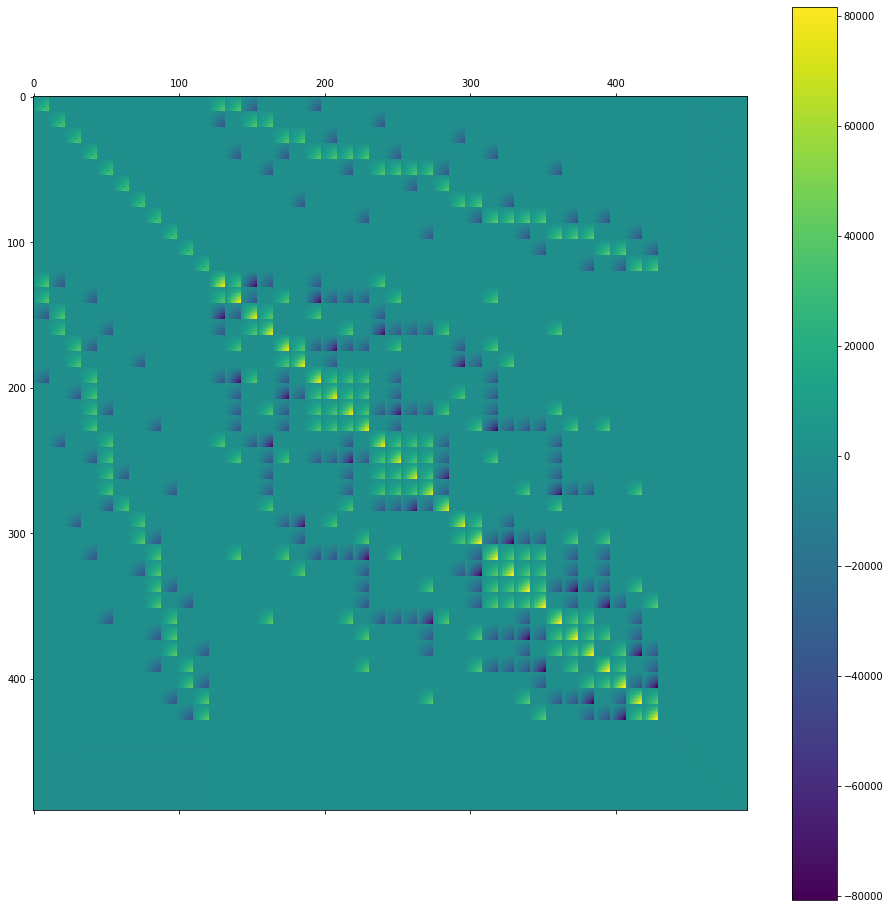

In [26]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [27]:
# Bus edge Ban map( Q ** 2)  可以通过就是 1 不可以就是 0
Ban_map_Bus = np.ones( Q**2 )



Final_QUBO_matrix, QUBO_Constraint_4 = Constraint_4(QUBO_matrix, Q, Ban_map_Bus ,penalty = 1e2)


print(np.shape(Final_QUBO_matrix))

(491, 491)


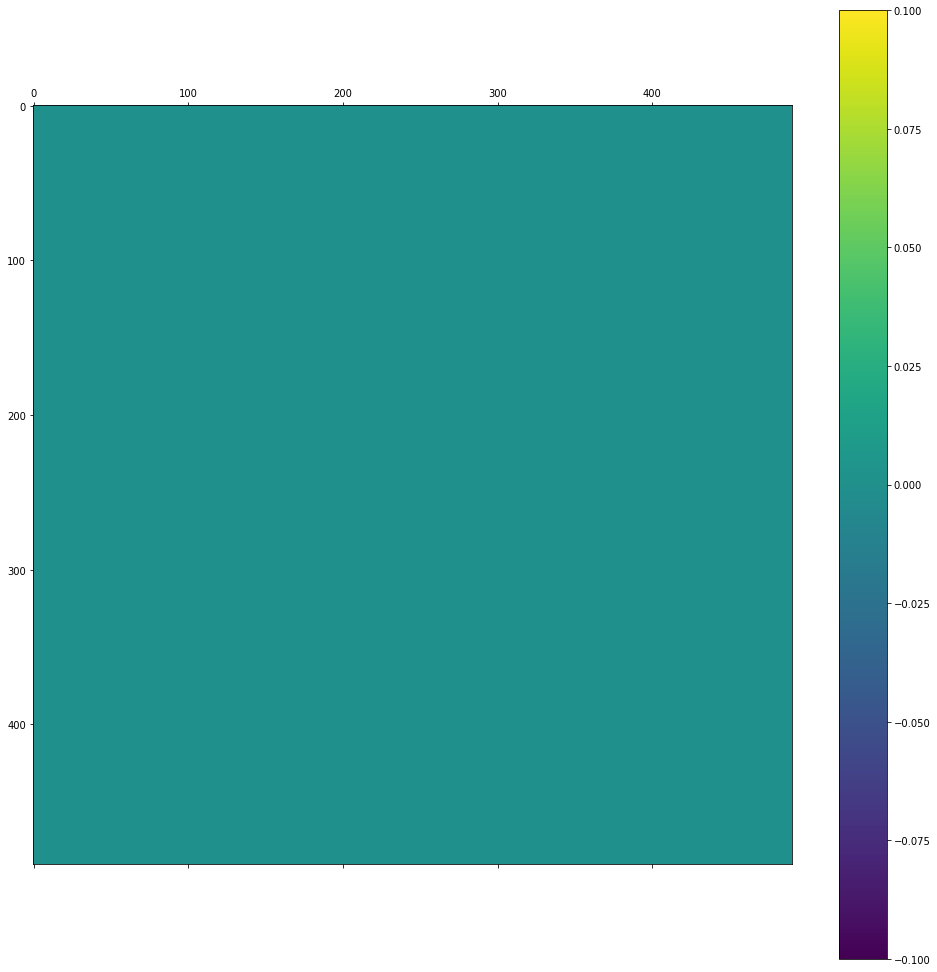

In [28]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_Constraint_4,fignum=matfig.number)
plt.colorbar()
plt.show()

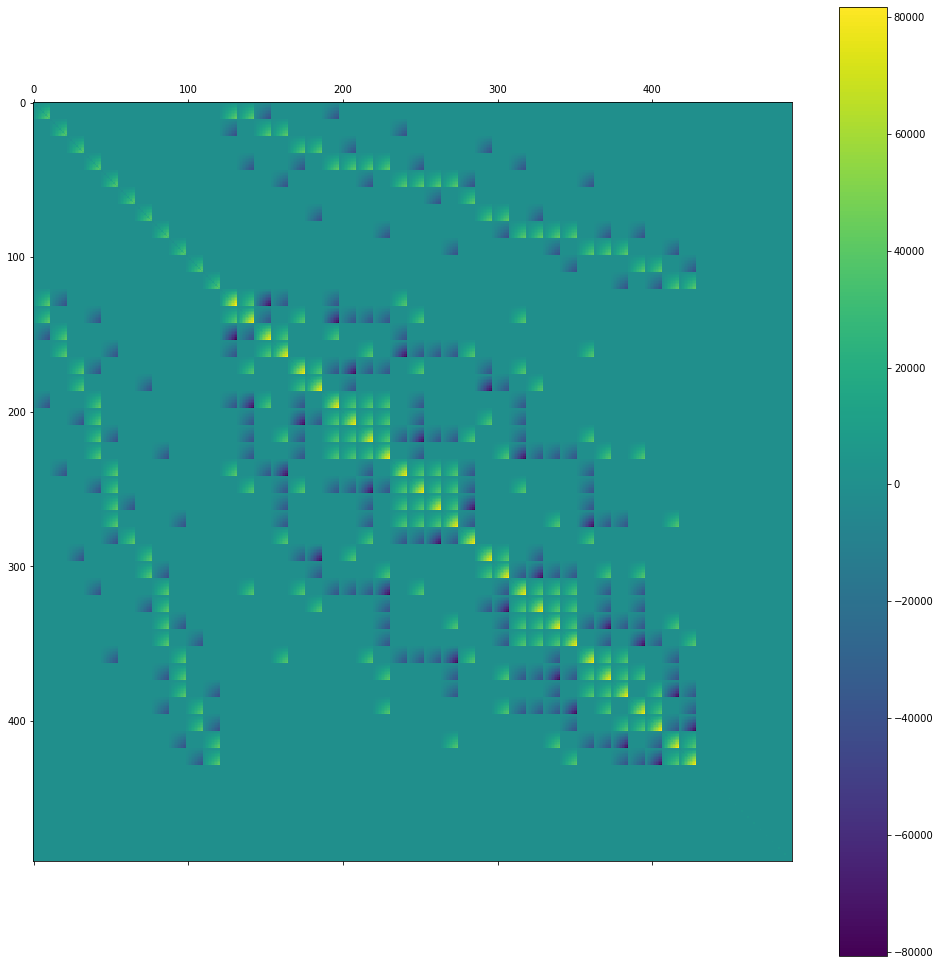

In [29]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(Final_QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

[ 22  56  97 112 132 154 210 268 297 332 396 430 432 434 435 436 438 440
 441 442 444 445 446 448 449 452 453 456 459 463 467 468 476 477 479 481
 485 487 489]
[ 22  56  97 112 132 154 210 268 297 332 396]
[ 2  5  8 10 12 14 19 24 27 30 36]
[0 1 9 2 0 0 1 4 0 2 0]
widths [1, 1, 1, 2, 5, 2, 1, 3, 10, 1, 3]


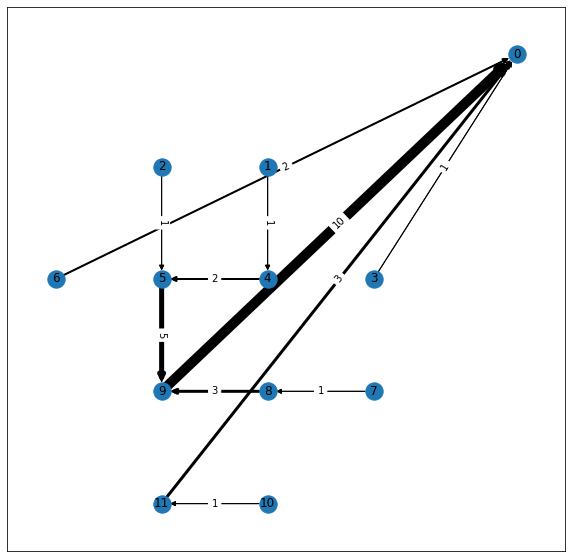

[ 34  55  69 114 121 154 177 242 330 375 396 429 430 432 433 434 435 436
 438 440 442 444 445 446 447 448 451 455 459 460 461 468 472 477 479 481
 485 488 489]
[ 34  55  69 114 121 154 177 242 330 375 396]
[ 3  5  6 10 11 14 16 22 30 34 36]
[1 0 3 4 0 0 1 0 0 1 0]
widths [1, 1, 2, 2, 1, 1, 4, 1, 2, 1, 5]


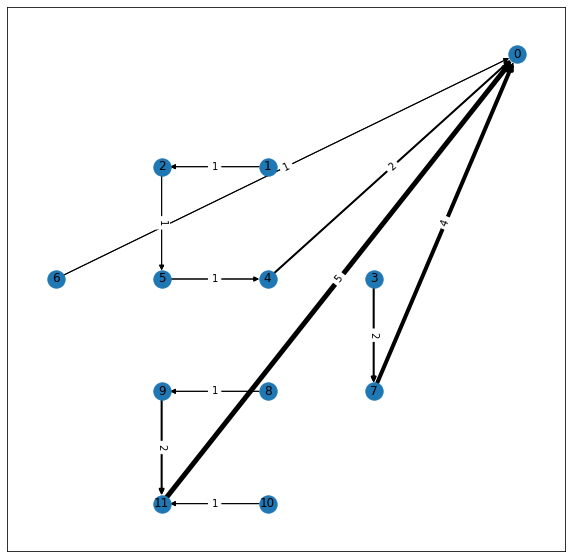

In [30]:
QUBO = Final_QUBO_matrix
#QUBO = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2 + QUBO_Constraint_add

width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)



OP = sampleset.to_pandas_dataframe()


OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

sampleset.info['qpu_access_time']

location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)

final_index = location[location < edge_number * Q ]
print(final_index)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))

print(str(final_index // Q))
print(str(final_index % Q))

for value in final_index:
    #print(str(value//Q))
    final_G.add_weighted_edges_from([(*edge, value % Q + 1) for edge, label in compelete_label.items() if label == str(value//Q)])
    
matfig = plt.figure(figsize=(10,10)) 
labels = nx.get_edge_attributes(final_G,'weight')
widths = list(nx.get_edge_attributes(final_G,'weight').values())
print("widths",widths)
nx.draw_networkx(final_G, pos)
nx.draw_networkx_edge_labels(final_G,pos,edge_labels = labels)
nx.draw_networkx_edges(final_G,pos,width = widths)

0.0
{'qpu_access_time': 0, 'charge_time': 2985900, 'run_time': 2985900, 'problem_id': '16e6dceb-01a8-4442-9119-b588165ae576'}


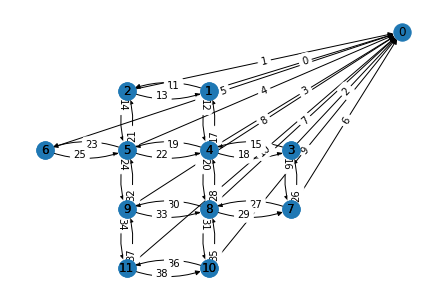

Now, checking Contraint 1
Constraint 1 is  True  ===> Constraint 1 is Done.
 
Now, checking Contraint 2
Constraint 2 is  False  ===> Constraint 2 is Done.
 
Now, checking Contraint 3
Constraint 3 is  False  ===> Constraint 3 is Done.
 


In [31]:
print(sampleset.info['qpu_access_time']*10**(-6))
print(sampleset.info)

G, compelete_label, graph = complete_Graph(network,pos)

Final_answer = sample[:edge_number*Q]

%run Function_set_dic.ipynb
check_1(Final_answer, network, Q, edge_number, edge_dictionary)
check_2(Final_answer, network, Q, edge_number, edge_dictionary)
check_3(Final_answer, network, Q, edge_number, edge_dictionary, m_t_u, m_t_l)

In [32]:
print(Q)
print(final_index//Q)
print(final_index%Q)

11
[ 3  5  6 10 11 14 16 22 30 34 36]
[1 0 3 4 0 0 1 0 0 1 0]


In [33]:

    
    
    #G.add_edges_from([(1, 2), (1, 3), (2, 3)])

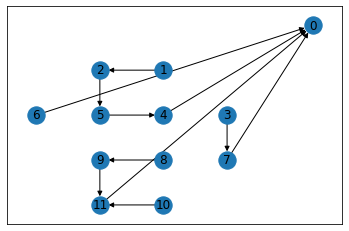

In [34]:
nx.draw_networkx(final_G, pos)


In [35]:
[edge for edge, label in compelete_label.items() if label == str(0)]

[(1, 0)]

In [36]:

'''
首先可以加的部分，导线长度 || pos - vertex ||_{1} 转化为成本


'''

'\n首先可以加的部分，导线长度 || pos - vertex ||_{1} 转化为成本\n\n\n'